In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [42]:
dataset_path = "/content/drive/MyDrive/Caltech101/101_ObjectCategories"
print(os.listdir(dataset_path))

['accordion', 'BACKGROUND_Google', 'anchor', 'airplanes', 'ant', 'beaver', 'bass', 'barrel', 'binocular', 'bonsai', 'car_side', 'brontosaurus', 'cannon', 'brain', 'buddha', 'butterfly', 'ceiling_fan', 'camera', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'dalmatian', 'crocodile_head', 'cougar_face', 'crayfish', 'crab', 'dollar_bill', 'crocodile', 'cup', 'dolphin', 'euphonium', 'dragonfly', 'ewer', 'elephant', 'electric_guitar', 'Faces_easy', 'ferry', 'emu', 'Faces', 'garfield', 'flamingo', 'hedgehog', 'flamingo_head', 'hawksbill', 'grand_piano', 'gramophone', 'gerenuk', 'headphone', 'helicopter', 'laptop', 'ibis', 'kangaroo', 'inline_skate', 'joshua_tree', 'lamp', 'ketch', 'Leopards', 'lobster', 'llama', 'lotus', 'mandolin', 'metronome', 'mayfly', 'okapi', 'nautilus', 'Motorbikes', 'octopus', 'menorah', 'minaret', 'pigeon', 'pagoda', 'panda', 'rooster', 'pizza', 'revolver', 'platypus', 'pyramid', 'rhino', 'saxophone', 'snoopy', 'schooner', 'scissors', 'scorpion', 'sea_horse', 's

In [43]:
selected_classes = [
    "airplanes",
    "Motorbikes",
    "Faces",
    "Faces_easy",
    "Leopards",
    "bonsai",
    "car_side",
    "butterfly",
    "chair",
    "camera",
    "cup",
    "lamp",
    "brain",
    "pizza",
    "watch",
    "dollar_bill",
    "scissors",
    "starfish",
    "sunflower",
    "anchor"
]

In [44]:
X = []
y = []

image_size = (128, 128)

# limit images per class (for faster training)
images_per_class = 75

for category in selected_classes:

    category_path = os.path.join(dataset_path, category)

    if not os.path.isdir(category_path):
        continue

    print("Loading category:", category)

    count = 0

    for image_name in os.listdir(category_path):

        if count >= images_per_class:
            break

        image_path = os.path.join(category_path, image_name)

        img = cv2.imread(image_path)

        if img is None:
            continue

        # resize image
        img = cv2.resize(img, image_size)

        # convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # extract HOG features
        features = hog(
          gray,
          orientations=9,
          pixels_per_cell=(8, 8),
          cells_per_block=(2, 2),
          block_norm='L2-Hys',
          visualize=False
      )

        X.append(features)
        y.append(category)

        count += 1

print("Feature extraction complete")

Loading category: airplanes
Loading category: Motorbikes
Loading category: Faces
Loading category: Faces_easy
Loading category: Leopards
Loading category: bonsai
Loading category: car_side
Loading category: butterfly
Loading category: chair
Loading category: camera
Loading category: cup
Loading category: lamp
Loading category: brain
Loading category: pizza
Loading category: watch
Loading category: dollar_bill
Loading category: scissors
Loading category: starfish
Loading category: sunflower
Loading category: anchor
Feature extraction complete


In [45]:
print(len(X))
print(len(y))

1318
1318


In [46]:
# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

print("Feature array shape:", X.shape)
print("Label array shape:", y.shape)


# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(

    X,
    y,

    test_size=0.2,

    random_state=42,

    stratify=y

)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Feature array shape: (1318, 8100)
Label array shape: (1318,)

Training samples: 1054
Testing samples: 264


Random Forest

In [47]:
model = RandomForestClassifier(

    n_estimators=400,

    max_depth=None,

    max_features='sqrt',

    bootstrap=True,

    random_state=42,

    n_jobs=-1

)

print("Training started...")

model.fit(X_train, y_train)

print("Training completed!")

Training started...
Training completed!


In [48]:
print("Testing started...")

y_pred = model.predict(X_test)

print("Testing completed!")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy:", accuracy)

Testing started...
Testing completed!

Test Accuracy: 0.7234848484848485


Confusion Matrix

<Figure size 1200x1200 with 0 Axes>

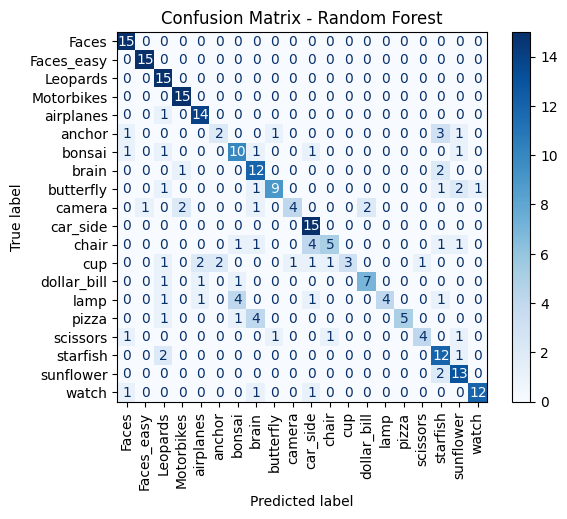

In [49]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a plot
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model.classes_
)

plt.figure(figsize=(12, 12))

disp.plot(
    xticks_rotation=90,
    cmap='Blues',
    values_format='d'
)

plt.title("Confusion Matrix - Random Forest")

plt.show()

Classification Report

In [50]:
print("Classification Report:\n")

print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

       Faces       0.79      1.00      0.88        15
  Faces_easy       0.94      1.00      0.97        15
    Leopards       0.62      1.00      0.77        15
  Motorbikes       0.83      1.00      0.91        15
   airplanes       0.78      0.93      0.85        15
      anchor       0.50      0.25      0.33         8
      bonsai       0.59      0.67      0.62        15
       brain       0.57      0.80      0.67        15
   butterfly       0.82      0.60      0.69        15
      camera       0.80      0.40      0.53        10
    car_side       0.65      1.00      0.79        15
       chair       0.71      0.38      0.50        13
         cup       1.00      0.25      0.40        12
 dollar_bill       0.78      0.70      0.74        10
        lamp       1.00      0.33      0.50        12
       pizza       1.00      0.45      0.62        11
    scissors       0.80      0.50      0.62         8
   

Cross Validation

In [51]:
print("Performing Cross Validation...\n")

cv_scores = cross_val_score(

    model,

    X_train,

    y_train,

    cv=5,

    n_jobs=-1

)

print("Cross Validation Scores:")

print(cv_scores)

print("\nAverage CV Score:")

print(cv_scores.mean())

Performing Cross Validation...

Cross Validation Scores:
[0.67298578 0.66350711 0.65402844 0.67772512 0.65238095]

Average CV Score:
0.6641254795757164
